Импорт необходимых библиотек и настройка отображения информации и сообщений. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,precision_score, recall_score
from sklearn.utils import shuffle
from sklearn.inspection import permutation_importance
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_absolute_percentage_error

from imblearn.over_sampling import SMOTE

from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline

from sklearn.pipeline import Pipeline


from catboost import CatBoostRegressor

SEED = 123456

import sys
import numpy as np
import random
import warnings

import dtale
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
import seaborn as sns
from tqdm.notebook import tqdm
from vininfo import Vin

In [2]:
warnings.filterwarnings('ignore')

Настроим появления сообщений при импорте и работе различных быблиотек. 

In [3]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [4]:
print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)

Python       : 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Numpy        : 1.23.5


In [5]:
data_test = pd.read_csv('test.csv')

In [6]:
data_train = pd.read_csv('train.csv')

## Займемся изучением данных и заполнением пропусков. 

Создадим функцию, которая выведет нам основную информацию о датасете. 

In [7]:
def read_data(data):
    name='data_'+data[:-4]
    print(name)
    name= pd.read_csv(data)
    name.info()
    display(name.head(10))
    print(pd.DataFrame(round(name.isna().mean()*100,)))
    print(round(name.isna().sum()))
    print(name.duplicated().sum())

In [8]:
read_data('test.csv')

data_test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)
5,2003,Volkswagen,Passat,GLS 1.8T,wagon,automatic,wvwvd63b93e175638,nc,2.4,104155.0,silver,black,fred anderson nissan of fayetteville,Tue Jun 09 2015 03:00:00 GMT-0700 (PDT)
6,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4ac4dh809686,il,3.7,30669.0,silver,gray,merchants leasing,Tue Mar 03 2015 02:00:00 GMT-0800 (PST)
7,2013,Ford,Explorer,Base,SUV,automatic,1fm5k7b97dgb16454,nc,3.2,87862.0,black,gray,ge fleet services for itself/servicer,Tue Feb 10 2015 01:15:00 GMT-0800 (PST)
8,2011,Infiniti,G Sedan,G37x,G Sedan,automatic,jn1cv6ar5bm411441,tn,3.5,47028.0,black,beige,nissan infiniti lt,Wed Feb 04 2015 02:30:00 GMT-0800 (PST)
9,2007,Chevrolet,Suburban,1500 LS,SUV,automatic,3gnfc16j77g158033,ga,3.4,191211.0,black,tan,riverside chevrolet inc,Tue Feb 10 2015 04:30:00 GMT-0800 (PST)


                 0
year           0.0
make           2.0
model          2.0
trim           2.0
body           2.0
transmission  12.0
vin            0.0
state          0.0
condition      2.0
odometer       0.0
color          0.0
interior       0.0
seller         0.0
saledate       0.0
year                0
make             2061
model            2079
trim             2114
body             2594
transmission    13011
vin                 0
state               0
condition        2379
odometer           19
color             158
interior          158
seller              0
saledate            0
dtype: int64
0


In [9]:
read_data('train.csv')

data_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)
5,2013,Lincoln,MKZ,Base,Sedan,automatic,3ln6l2j91dr817800,mi,2.5,14894.0,black,black,"ford motor credit company,llc",22600,Thu May 21 2015 02:00:00 GMT-0700 (PDT)
6,2010,pontiac,g6,4c,NaN,automatic,1g2za5eb4a4157380,nc,3.4,114587.0,silver,black,north state acceptance,5900,Mon Jan 12 2015 09:30:00 GMT-0800 (PST)
7,2013,Ford,Escape,SE,SUV,automatic,1fmcu0gx3duc59421,fl,4.8,26273.0,blue,gray,fields bmw,15200,Tue Feb 03 2015 01:00:00 GMT-0800 (PST)
8,2000,Hyundai,Elantra,GLS,Sedan,automatic,kmhjf35f2yu955691,oh,1.9,182624.0,black,tan,dt inventory,700,Thu Jan 22 2015 01:00:00 GMT-0800 (PST)
9,2005,Ford,Freestyle,Limited,wagon,automatic,1fmdk06135ga45438,oh,1.0,149364.0,black,tan,wells fargo dealer services,325,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)


                 0
year           0.0
make           2.0
model          2.0
trim           2.0
body           2.0
transmission  12.0
vin            0.0
state          0.0
condition      2.0
odometer       0.0
color          0.0
interior       0.0
seller         0.0
sellingprice   0.0
saledate       0.0
year                0
make             8043
model            8123
trim             8337
body            10393
transmission    51461
vin                 0
state               0
condition        9405
odometer           69
color             586
interior          586
seller              0
sellingprice        0
saledate            0
dtype: int64
0


Мы можем увидеть, что в таблицах присутствуют пропуска, в процентном соотношении их количество не велико. Запишем количество строк каждой из таблиц впеременную, что бы произвести анализ после заполнения или удаления пропусков. Посмотрим на процентное соотношение данных до и после изменений. 

In [10]:
size_train = data_train.shape[0]
size_test = data_test.shape[0]

Напишем функцию, которая нам преобразует вид в понятный для нас формат и удалит лишнюю информацию, а именно время и часовой пояс.

In [11]:
def date(data):
    data['date'] = pd.to_datetime(data['saledate'], infer_datetime_format=True, utc=True)
    data['date'] = data['date'].dt.date
    data = data.drop(columns=['saledate'], axis=1, inplace=True)
    return data

Применим нашу функцию к датасетам.

In [12]:
date(data_test)

In [13]:
date(data_train)

In [14]:
data_test['date'] = data_test['date'].astype('datetime64[ns]')
data_train['date'] = data_train['date'].astype('datetime64[ns]')

In [15]:
display(data_train.head(10))

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,date
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,2015-06-01
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,2015-02-24
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,2015-06-09
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,2015-06-16
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,2015-02-02
5,2013,Lincoln,MKZ,Base,Sedan,automatic,3ln6l2j91dr817800,mi,2.5,14894.0,black,black,"ford motor credit company,llc",22600,2015-05-20
6,2010,pontiac,g6,4c,NaN,automatic,1g2za5eb4a4157380,nc,3.4,114587.0,silver,black,north state acceptance,5900,2015-01-12
7,2013,Ford,Escape,SE,SUV,automatic,1fmcu0gx3duc59421,fl,4.8,26273.0,blue,gray,fields bmw,15200,2015-02-02
8,2000,Hyundai,Elantra,GLS,Sedan,automatic,kmhjf35f2yu955691,oh,1.9,182624.0,black,tan,dt inventory,700,2015-01-21
9,2005,Ford,Freestyle,Limited,wagon,automatic,1fmdk06135ga45438,oh,1.0,149364.0,black,tan,wells fargo dealer services,325,2015-06-15


In [16]:
numeric_list = ['year', 'odometer', 'sellingprice', 'condition']

In [17]:
text_list = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',  'color', 'interior', 'seller']

Займемся заполнением самого большого количества пропусков, а именно 'transmission'.  При долгих попытках заполнить пропуски при помощи LogisticRegression успеха не достиг, поскльку в 2-х датасетах находятся разлиыное количество моделей, и при получении предсказаний, мы получаем несоответствеи количества колонок, были удалены различные колони, даже получены результаты заполнения пропусков, но было удало 50% несоответствующих моделей(колонок) и было принято решение изменить подход, данный способ работает быстрее и стабильнее. 

In [18]:
def transmission(data):
    new_transmission = {}
    for i in data['model'].unique():
        counted=[]
        try:
            for x in data['transmission'].unique():
                if x == 'Nan':
                    pass
                counted.append([x, data.loc[(data['model'] == i) & (data['transmission'] == x), ['transmission']].count()])
        except:
            counted.append('Nan')
        try:
            if counted[0][1] >= counted[1][0]:
                new_transmission[i] = counted[0][0]
            else:
                new_transmission[i] = counted[1][0]
        except:
            new_transmission[i] = counted[0][0]
    for y in data['model'].unique():
        data.loc[(data['model'] == y) & (data['transmission'].isna()), 'transmission'] = new_transmission[y]
    return data

In [19]:
transmission(data_test)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,date
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,2015-01-13
1,2014,GMC,Savana Cargo,2500,Van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,2015-02-26
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,2015-02-23
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,2015-03-05
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,2015-06-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110053,2011,Jeep,Wrangler,Sport,SUV,automatic,1j4aa2d17bl584330,ca,3.8,66085.0,orange,black,dtg operations inc,2015-01-14
110054,2014,Lexus,IS 250,Base,sedan,automatic,jthbf1d23e5007526,fl,4.8,17588.0,gray,black,lexus financial services,2015-06-15
110055,2004,Nissan,Maxima,3.5 SL,Sedan,automatic,1n4ba41e54c831950,va,2.9,124036.0,silver,gray,shirlie slack mitsubishi,2015-02-04
110056,2013,Nissan,370Z,Base,coupe,manual,jn1az4eh3dm382431,tx,2.2,27169.0,—,black,nissan motor acceptance corporation,2015-06-16


In [20]:
transmission(data_train)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,date
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,2015-06-01
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,2015-02-24
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,2015-06-09
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,2015-06-16
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,2015-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440231,2013,Kia,Optima,EX Hybrid,Sedan,automatic,knagm4ad4d5057805,ca,4.5,20434.0,white,beige,"kia motors america, inc",16000,2015-01-19
440232,2014,MINI,Cooper Countryman,S ALL4,Wagon,automatic,wmwzc5c55ewp36517,wi,2.9,14675.0,white,black,bmw mini financial services,24250,2015-02-10
440233,2008,BMW,6 Series,650i,Coupe,automatic,wbaea53588cv90110,ca,3.7,102552.0,gray,black,studio city auto group,16750,2015-03-02
440234,2014,Ram,2500,SLT,Crew Cab,automatic,3c6ur5dl2eg243568,tx,3.0,29367.0,white,gray,express car & truck rental,33000,2015-01-13


In [21]:
print(round(data_train['transmission'].isna().sum()))

1390


In [22]:
data_train = data_train.dropna(subset=['transmission', 'body', 'condition', 'color', 'model', 'odometer'])

In [23]:
size_train_after = data_train.shape[0]


In [24]:
lost_data = size_train_after/size_train *100

In [25]:
print(100 - lost_data)

4.522119953842946


При заполнении и удалении пропусков было потеряно 5% данных, значение не велико, если это пагубно скажется на обучении модели, то вернемся к вопросу заполнения пропусков. Использование библиотек, по декодировке Vin пользы не принесло. Работает медленно и не стабильно. Новых библиотек, которые поддерживались бы в актуальном состоянии нет. 

## Изучение данных

Изучим полученные результаты при помощи Dtale

In [26]:
dtale.show(data_train)

В данных имеются аномальные чилосвые значения, изучим их более детальо.  Проверим данные на высокую степень кореляции, поскольку данный фактор негативно сказывается на обучении моделей. Напишем отдельную функцию, которая позволит проверить на мультиколлинеарность наши модели и используем для этого фактор инфляции дисперсии(VIF), посколько данный фактор лучше определит зависимости. Коэффициент VIF определяется границами 5 - 10, если значение находится в данных пределах, значит имеется высокая колеряционная зависимость между данными и следует рассмотреть их удаление.

In [27]:
def data_correllation(data):
    numeric = list(data.select_dtypes('number').columns)
    print(pd.Series(
    [variance_inflation_factor(data[numeric].values, i) 
     for i in range(data[numeric].shape[1])],
    index=data[numeric].columns
    ))

In [28]:
data_correllation(data_train)

year            29.847566
condition       22.401945
odometer         4.364124
sellingprice     5.121004
dtype: float64


Мультиколлинеарность присутствует, но в минимальных пределах, совершенно закономерная зависмиость пробега от года, а так же цены от года. Если модель будет вести себя не корректно, вернумся к данному вопросу. 

Изучим всплески в цифровых значениях. 

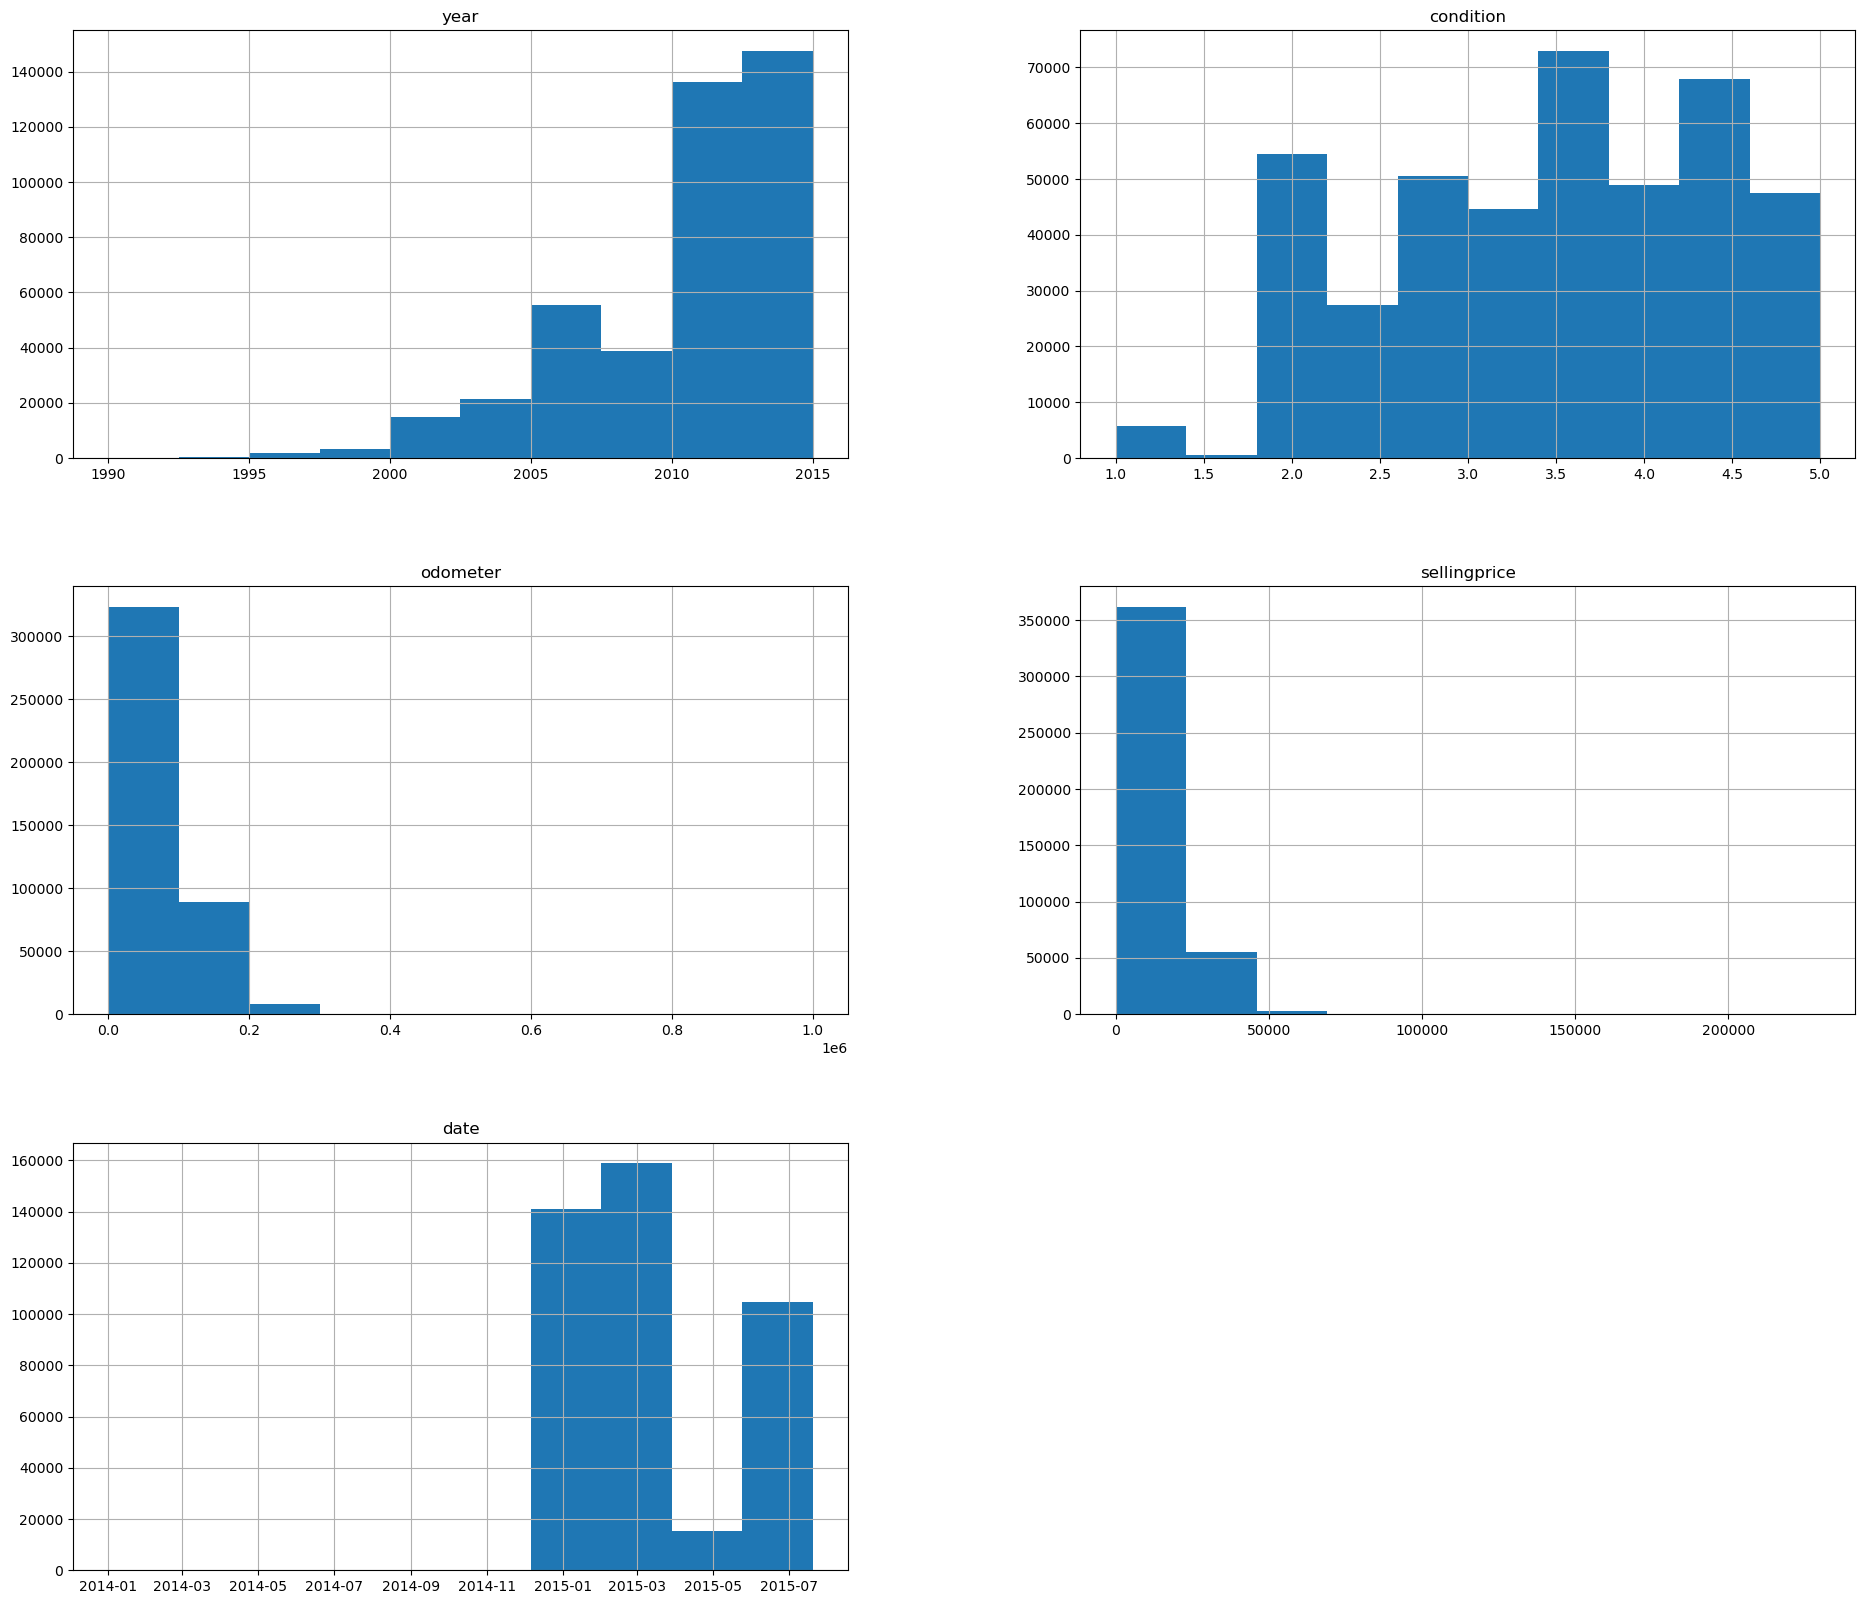

In [29]:
data_train.hist(figsize=(23, 20));

Изучим числовые данные более детально. 

In [30]:
def plot(data): 
    plt.figure(figsize=(15,8))
    sns.set(style='white')
    boxplot = sns.boxplot(data=data, palette = "Set2", width=0.75, whis=2)
    boxplot.axes.set_title("всплески", fontsize=20, color='Green')

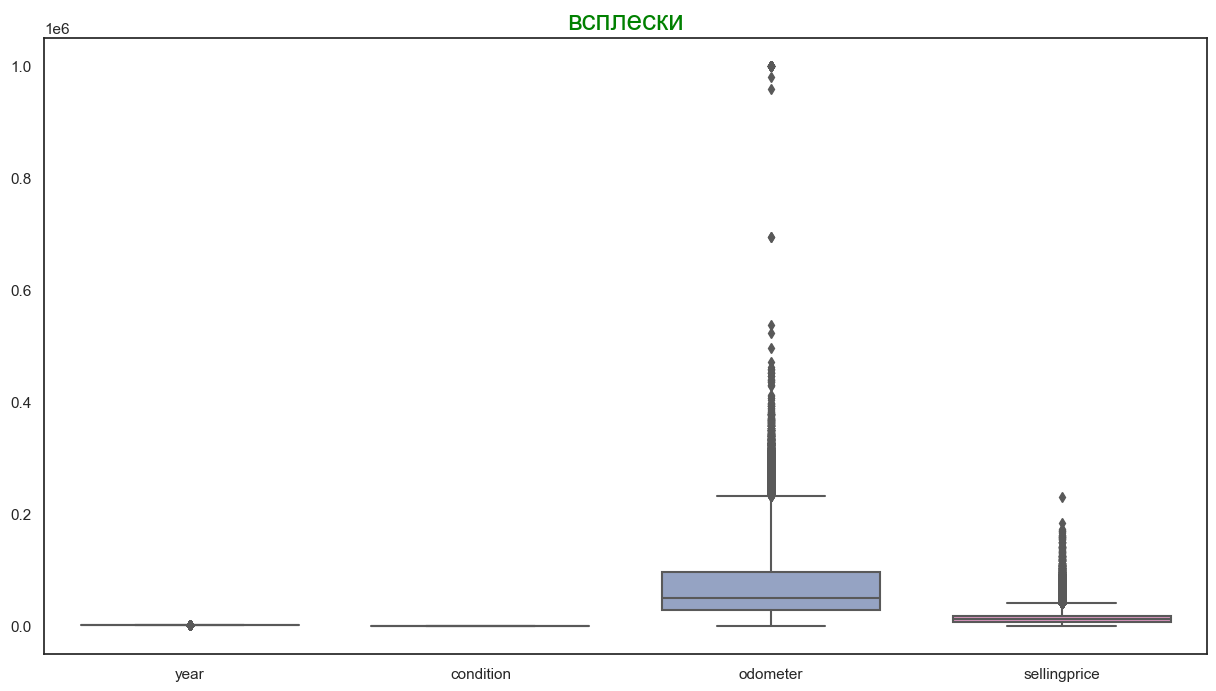

In [31]:
plot(data_train)

Кам мы можем заметить в данных присутствуют всплески, а именно в пробеге (тестовая выборка) и в пробеге, в стоимости(обучающая выборка). изучим их более деально. 

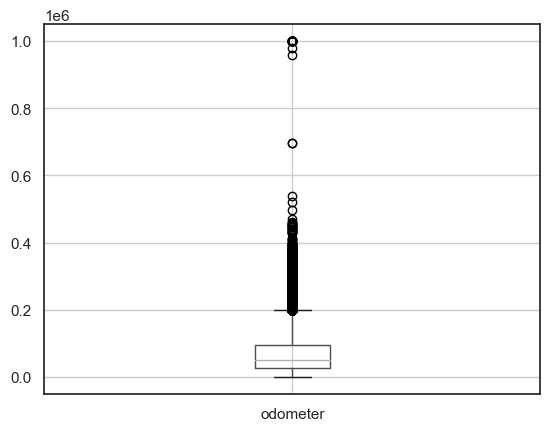

In [32]:
data_train.boxplot(column=['odometer']);

Выведем общую информацию о данных. 

In [33]:
data_train['odometer'].describe()

count    420328.000000
mean      66260.870156
std       52235.162609
min           1.000000
25%       27615.000000
50%       49980.000000
75%       95931.000000
max      999999.000000
Name: odometer, dtype: float64

Мы видим, что в данных есть анамальные значения, такие как 999.999км пробега. Наверное в мире существуют автомобили с данным пробегом, но это редкость. Посмотрим какое количество записей мы имеем в данном диапазаоне.

In [34]:
data_train.query('odometer >= 200000')['odometer'].count()

8237

In [35]:
data_train.query('odometer <=1')['odometer'].count()

915

In [36]:
data_train = data_train.query('odometer <= 200000')

После изучения данных было принято решение, оставить пробег, который не привышает 200т.км. Проверим, как это повлияет на распределение данных. 

In [37]:
data_train['odometer'].describe()

count    412093.000000
mean      62807.826503
std       45575.013653
min           1.000000
25%       27188.000000
50%       48683.000000
75%       92751.000000
max      200000.000000
Name: odometer, dtype: float64

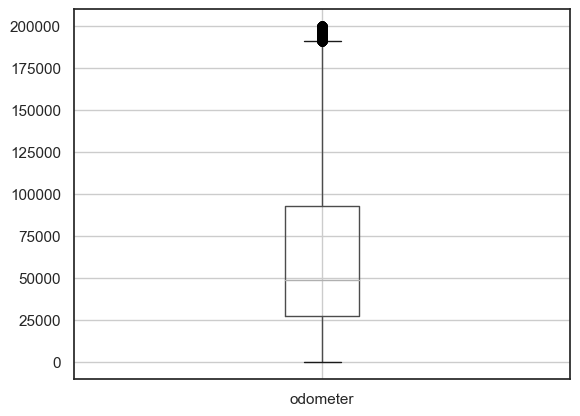

In [38]:
data_train.boxplot(column=['odometer']);

Мы смогли привести данные к нормальному распределению значений, всплесков минимальное количество, данных было удалено не более 2-х процентов. Но это позволит значительно улучшить метрику модели. Посмотрим как изменилось распределение данных в колонке стоимости, после внесенных  нами изменений. 

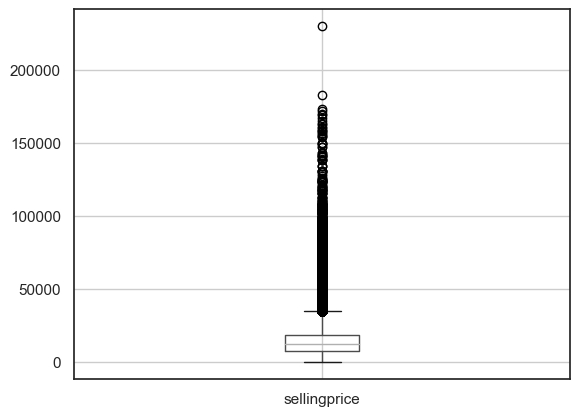

In [39]:
data_train.boxplot(column=['sellingprice']);

In [40]:
data_train.query('sellingprice >= 50000')['sellingprice'].count()

2601

Мы можем свами увидеть, что анамальных значений не так уж и много, мы можем их удалить, поскольку стрим модель для более широкого применнеия, а дорогие и редкие автомобили, могут негативно сказаться на обучающей моделе. Редкие авто могут стоить дорого, даже если у них очень большой пробег, а так же очень старый год изготовления. А данные фактора корелируют между собой, что может повлесь негативные последствия для обучающей модели. Удалим их. 

In [41]:
data_train = data_train.query('sellingprice <= 50000')

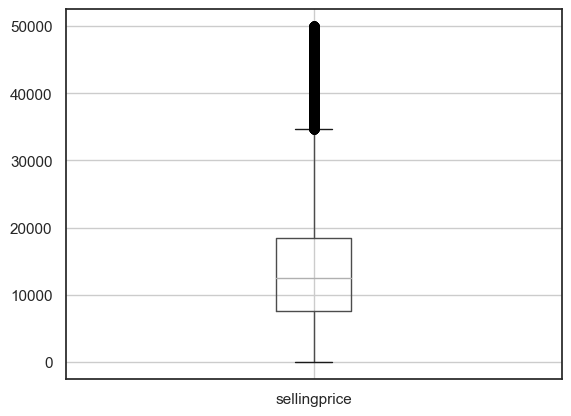

In [42]:
data_train.boxplot(column=['sellingprice']);

In [43]:
data_train['sellingprice'].describe()

count    409565.000000
mean      13749.479685
std        8642.024820
min           1.000000
25%        7600.000000
50%       12500.000000
75%       18400.000000
max       50000.000000
Name: sellingprice, dtype: float64

Мы  добились нормального распределения данных, о чем свидетельствует среднее значение и mean, разница у них не большая. Изучим год. 

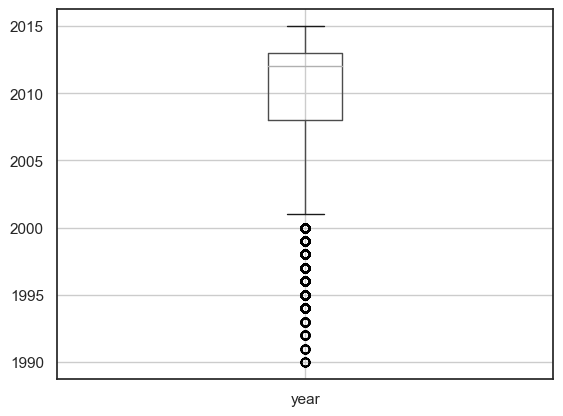

In [44]:
data_train.boxplot(column=['year']);

In [45]:
data_train.query('year <= 1995')['year'].count()

721

Имеются всплески по годам, оставим только машины с 1995 года. если будут проблемы, то вернемся к данному вопросу. 

In [46]:
data_train = data_train.query('year >= 1995') 

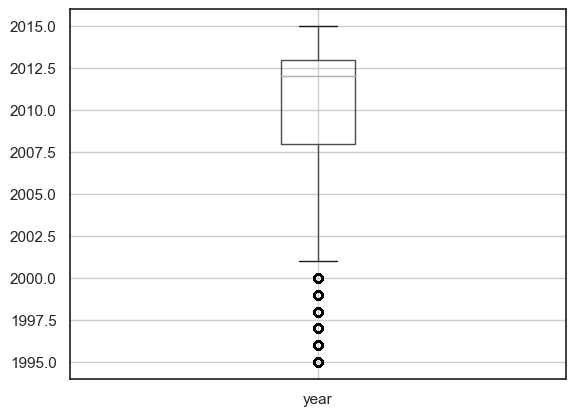

In [47]:
data_train.boxplot(column=['year']);

Что бы избежать проблем с тестированием модели, изучим тестовую выборку и приведем ее к аналогичному виду, как и тестовую.

Проверим всплески в тестовой выборке. 

Мы привели обе выборки, к одинаковым числовым значениям, это позволит нам избежать проблем при обучении модели. Теперь борьба с неявными дубликатами. 

Напишем функцию, которая приведет все названия к одному виде, а именно удалит пробелы и приведет все к одному регистру. 

In [48]:
def duplicat(data, spis):
    for i in spis:
        data[i] = data[i].str.lower()
        data[i] = data[i].str.replace('  ', ' ')
        data[i] = data[i].str.strip()

In [49]:
duplicat(data_train, text_list)

In [50]:
display(data_train.head(10))

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,date
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,2015-06-01
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,2015-02-24
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,2015-06-09
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,2015-06-16
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,2015-02-02
5,2013,lincoln,mkz,base,sedan,automatic,3ln6l2j91dr817800,mi,2.5,14894.0,black,black,"ford motor credit company,llc",22600,2015-05-20
7,2013,ford,escape,se,suv,automatic,1fmcu0gx3duc59421,fl,4.8,26273.0,blue,gray,fields bmw,15200,2015-02-02
8,2000,hyundai,elantra,gls,sedan,automatic,kmhjf35f2yu955691,oh,1.9,182624.0,black,tan,dt inventory,700,2015-01-21
9,2005,ford,freestyle,limited,wagon,automatic,1fmdk06135ga45438,oh,1.0,149364.0,black,tan,wells fargo dealer services,325,2015-06-15
11,2011,buick,lucerne,cxl,sedan,automatic,1g4hc5em5bu146484,mo,4.8,74760.0,white,tan,santander consumer,12400,2015-01-20


In [51]:
duplicat(data_test, text_list)

In [52]:
display(data_test.head(10))

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,date
0,2005,cadillac,cts,base,sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,2015-01-13
1,2014,gmc,savana cargo,2500,van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,2015-02-26
2,2013,nissan,murano,s,suv,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,2015-02-23
3,2013,chevrolet,impala,ls fleet,sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,2015-03-05
4,2013,nissan,titan,sv,crew cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,2015-06-02
5,2003,volkswagen,passat,gls 1.8t,wagon,automatic,wvwvd63b93e175638,nc,2.4,104155.0,silver,black,fred anderson nissan of fayetteville,2015-06-08
6,2013,hyundai,sonata,gls,sedan,automatic,5npeb4ac4dh809686,il,3.7,30669.0,silver,gray,merchants leasing,2015-03-02
7,2013,ford,explorer,base,suv,automatic,1fm5k7b97dgb16454,nc,3.2,87862.0,black,gray,ge fleet services for itself/servicer,2015-02-09
8,2011,infiniti,g sedan,g37x,g sedan,automatic,jn1cv6ar5bm411441,tn,3.5,47028.0,black,beige,nissan infiniti lt,2015-02-03
9,2007,chevrolet,suburban,1500 ls,suv,automatic,3gnfc16j77g158033,ga,3.4,191211.0,black,tan,riverside chevrolet inc,2015-02-09


На данном этапе, данные подготовлены к дальнейшей работе с ними. Все тектовые значения приведены к одному регистру, удалены лишние пробелы, была попытка применить алгоритм Левинштайна, но это занимает очень много времени, принято решение работать без него, если будет время к данному вопросу мы еще вернемся. 

Предобработка данных завершена, у нас все данные имеют хорощую распределенность, все текстовые данные приведены к одному регистру. Теперь нужно избавиться от неинформативных данных, таких как VIN и  возможно от данных, кто именно продал машину, если бы мы опирались в моделе на ригионы где машины была продана, данная информация играла бы важнуюю роль, но мы судим о машине исхожя только из ее данных - комплектация и тд.. За регион продажи будут отвечать данные с информацие о штате. 

In [53]:
data_save = data_test.copy()

In [54]:
def dell_vin_seller(data):
    data = data.drop(columns=['vin', 'seller'], axis=1, inplace=True)

In [55]:
dell_vin_seller(data_train)

Ддобавим колонку возраста авто. Эти данные мы сможем получить округлив до года дату продажи и вычесть из него дату изготовления. 

In [56]:
def age_auto(data):
    data['age'] = data['date'].dt.year - data['year']
    data['age'] = data['age'].astype("int16")

In [57]:
data_train.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice,date
0,2011,ford,edge,sel,suv,automatic,md,4.2,111041.0,black,black,12500,2015-06-01
1,2014,ford,fusion,se,sedan,automatic,mo,3.5,31034.0,black,black,14500,2015-02-24
2,2012,nissan,sentra,2.0 sl,sedan,automatic,nj,2.2,35619.0,black,black,9100,2015-06-09
3,2003,hummer,h2,base,suv,automatic,tx,2.8,131301.0,gold,beige,13300,2015-06-16
4,2007,ford,fusion,sel,sedan,automatic,md,2.0,127709.0,black,black,1300,2015-02-02


In [58]:
age_auto(data_train)

In [59]:
age_auto(data_test)

После добавления колонки с возратсом  удалим колонку с датой продажи, для нас она более не информативна, поскольку не несет никакой полезной информации именно о машине.

In [60]:
data_test = data_test.drop(columns=['date'], axis=1)
data_train = data_train.drop(columns=['date'], axis=1)

In [61]:
data_train.head(10)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice,age
0,2011,ford,edge,sel,suv,automatic,md,4.2,111041.0,black,black,12500,4
1,2014,ford,fusion,se,sedan,automatic,mo,3.5,31034.0,black,black,14500,1
2,2012,nissan,sentra,2.0 sl,sedan,automatic,nj,2.2,35619.0,black,black,9100,3
3,2003,hummer,h2,base,suv,automatic,tx,2.8,131301.0,gold,beige,13300,12
4,2007,ford,fusion,sel,sedan,automatic,md,2.0,127709.0,black,black,1300,8
5,2013,lincoln,mkz,base,sedan,automatic,mi,2.5,14894.0,black,black,22600,2
7,2013,ford,escape,se,suv,automatic,fl,4.8,26273.0,blue,gray,15200,2
8,2000,hyundai,elantra,gls,sedan,automatic,oh,1.9,182624.0,black,tan,700,15
9,2005,ford,freestyle,limited,wagon,automatic,oh,1.0,149364.0,black,tan,325,10
11,2011,buick,lucerne,cxl,sedan,automatic,mo,4.8,74760.0,white,tan,12400,4


## Подготовка данных

Проведем кодировку данных, для уменьшения объема занимаемой памяти датасетом. 

In [62]:
# uint16 колонки
uint16_columns = ['condition', 'odometer']

# category колонки

# изменяем dtypes колонок
data_train = data_train.astype({
    **{_:'int16' for _ in ['year', 'age', 'sellingprice']},
    **{_:'uint16' for _ in uint16_columns},
})


In [63]:
text_list = ['make', 'model', 'trim', 'body', 'transmission', 'state',  'color', 'interior']

In [64]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409177 entries, 0 to 440235
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          409177 non-null  int16 
 1   make          409177 non-null  object
 2   model         409177 non-null  object
 3   trim          409177 non-null  object
 4   body          409177 non-null  object
 5   transmission  409177 non-null  object
 6   state         409177 non-null  object
 7   condition     409177 non-null  uint16
 8   odometer      409177 non-null  uint16
 9   color         409177 non-null  object
 10  interior      409177 non-null  object
 11  sellingprice  409177 non-null  int16 
 12  age           409177 non-null  int16 
dtypes: int16(3), object(8), uint16(2)
memory usage: 32.0+ MB


transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), text_list),
    remainder='passthrough')
transformed = transformer.fit_transform(data_test)
features_test = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
display(features_test)

In [65]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  109702 non-null  object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  age           110058 non-null  int16  
dtypes: float64(2), int16(1), int64(1), object(10)
memory usage: 11.1+ MB


## Заполнение пропусков в data_test

In [66]:
data_test.isna().sum()

year               0
make            2061
model           2079
trim            2114
body            2594
transmission     356
vin                0
state              0
condition       2379
odometer          19
color            158
interior         158
seller             0
age                0
dtype: int64

Напишем функции заполнения ропусков при помощи библиотеки VIN Info.

In [67]:
def make(data):
    for i in tqdm(data.index):
        if pd.isnull(data.loc[i, 'make']):
            try:
                data['make'][i] = Vin(data['vin'][i]).wmi
            except:
                data['make'][i] = 'not info'

In [68]:
def model(data):
    for i in tqdm(data.index):
        if pd.isnull(data.loc[i, 'model']):
            try:
                data['model'][i] = Vin(data['vin'][i]).wmi
            except:
                data['model'][i] = 'not info'

In [69]:
make(data_test)

  0%|          | 0/110058 [00:00<?, ?it/s]

In [70]:
model(data_test)

  0%|          | 0/110058 [00:00<?, ?it/s]

Напишем лямбда функцию для заполнения пропусков наиболее частыми вариантами в своих группах. Данных немного, но другого варианта заполнения пропусков не нашлось. 

In [71]:
f = lambda x: x.mode().iat[0] if x.notna().any() else 'not info'    

data_test['body'] = data_test.groupby('model')['body'].transform(f)

In [72]:
f = lambda x: x.mode().iat[0] if x.notna().any() else 'not info'    

data_test['trim'] = data_test.groupby('model')['trim'].transform(f)

Наишем функцию заполнения пропусков с информацией о состоянии машины, сделаем выводы исходя из возраста автомобиля. Данных не много, посмотим, как это скажется на обучении.

In [73]:
def condition(data):
        for i in range(data.shape[0]):
            try:
                if pd.isnull(data_test.loc[i, 'condition']):
                    if data['age'][i] <= 1:                  
                        data['condition'][i] = 5.0
                    elif data['age'][i] > 1 and data['age'][i] <= 3:                  
                         data['condition'][i] = 4.0
                    elif data['age'][i] > 3 and data['age'][i] <= 5:
                         data['condition'][i] = 3.0
                    elif data['age'][i] > 5:
                         data['condition'][i] = 3.0
            except:
                data['condition'][i] = 0

In [74]:
condition(data_test)

Заполним остальные пропуски наиболее частыми  значениями в своих группах, числовые значения заполним средними значениями.

In [75]:
mode = data_test['transmission'].value_counts().index[0]
data_test['transmission'].fillna(value=mode, inplace=True)

In [76]:
avg = data_test['odometer'].mean()
data_test['odometer'].fillna(value=avg, inplace=True)

In [77]:
f = lambda x: x.mode().iat[0] if x.notna().any() else 'not info'    

data_test['color'] = data_test.groupby('model')['color'].transform(f)

In [78]:
f = lambda x: x.mode().iat[0] if x.notna().any() else 'not info'    

data_test['interior'] = data_test.groupby('model')['interior'].transform(f)

In [79]:
data_test_cat = data_test.copy()

##  Модель LinearRegression

Создадим трансформер для различных колонок, в случае с "линейными" моделями к категориальным применим OHE, к числовым - StandardScaler. 

In [80]:
linear_transformer = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown='ignore'),
        text_list
    ),
    (
        StandardScaler(
        ), make_column_selector(dtype_include='number')
    ),
    remainder='passthrough'
)

Создадим pipline

In [81]:
pipe_lr = make_pipeline(
    linear_transformer,
    LinearRegression(
                n_jobs=-1
    )
)

Зададим сетку параметров и создадим estimator.

In [82]:
param_grid = {}

gs_lr = GridSearchCV(
    pipe_lr,
    param_grid,
    verbose=1,
)

Обучим модель, поскльку объем данных слишком большой и компьютер не может их все обработать, обрежим данные.

In [83]:
X = data_train[:int(data_train.shape[0]/1000)].drop(columns=['sellingprice'], axis=1)
y = data_train['sellingprice'][:int(data_train.shape[0]/1000)]

In [84]:
gs_lr.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make',
                                                                          'model',
                                                                          'trim',
                                                                          'body',
                                                                          'transmission',
                                                                          'state',
                                                                          'color',
                                                                          'interior']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000022CA9F01910>)])),
                                       ('linearregression',
                                        LinearRegression(n_jobs=-1))]),
             param_grid={}, verbose=1)

In [85]:
test_preds = gs_lr.predict(data_test)

In [86]:
train_preds = gs_lr.predict(X)

In [87]:
error = mean_absolute_percentage_error(y, train_preds)

In [88]:
print(error)

0.1737014761580211


Данная модель показывает хорошуб метрику, но к сожалению только на не больших объемах данных, если увеличить объем обучающей выборки, то метрика МАРЕ увеличивается, что свидетельствует о ухудшении модели. Объем данных был уменьшен в связи с ограниченными способностями аппаратных стредств, воспользоваться облачыми технологиями не позволяет место положения. 

##  Модель RandomForestRegressor

In [89]:
forest_transformer_rf = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown='ignore'),
        text_list
    ),
    (
        StandardScaler(
        ), make_column_selector(dtype_include='number')
    ),
    remainder='passthrough'
)

In [90]:
pipe_rf = make_pipeline(
    forest_transformer_rf,
    RandomForestRegressor(n_estimators=200)
)

   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8],
   'criterion' :['mse', 'mae']

In [91]:
param_gri_rf = {}

gs_rf = GridSearchCV(
    pipe_rf,
    param_grid=param_gri_rf,
    verbose=1,
)

In [92]:
X = data_train[:int(data_train.shape[0]/100)].drop(columns=['sellingprice'], axis=1)
y = data_train['sellingprice'][:int(data_train.shape[0]/100)]

In [93]:
gs_rf.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make',
                                                                          'model',
                                                                          'trim',
                                                                          'body',
                                                                          'transmission',
                                                                          'state',
                                                                          'color',
                                                                          'interior']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000022CB5277450>)])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(n_estimators=200))]),
             param_grid={}, verbose=1)

In [94]:
test_preds = gs_rf.predict(data_test)

In [95]:
train_preds_rf = gs_rf.predict(X)

In [96]:
error = mean_absolute_percentage_error(y, train_preds_rf)

In [97]:
print(error)

0.12565578349877293


In [98]:
print(train_preds_rf[:10])

[14069.    14358.     8857.    10003.375  2899.5   20695.75  15278.07
   808.875  1583.375 11887.75 ]


In [99]:
data_test['sellingprice']=test_preds

In [100]:
data_test.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,age,sellingprice
0,2005,cadillac,cts,base,sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,black,black,lexus of stevens creek,10,5942.50
1,2014,gmc,savana cargo,2500,van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,1,21487.50
2,2013,nissan,murano,sl,suv,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,black,black,nissan-infiniti lt,2,21231.57
3,2013,chevrolet,impala,lt,sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,gray,onemain rem/auto club of miami inc dba north dad,2,9229.50
4,2013,nissan,titan,se,crew cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,2,19970.31
5,2003,volkswagen,passat,se pzev,sedan,automatic,wvwvd63b93e175638,nc,2.4,104155.0,gray,black,fred anderson nissan of fayetteville,12,4094.75
6,2013,hyundai,sonata,gls,sedan,automatic,5npeb4ac4dh809686,il,3.7,30669.0,silver,gray,merchants leasing,2,12620.50
7,2013,ford,explorer,xlt,suv,automatic,1fm5k7b97dgb16454,nc,3.2,87862.0,black,black,ge fleet services for itself/servicer,2,20165.61
8,2011,infiniti,g sedan,g37x,g sedan,automatic,jn1cv6ar5bm411441,tn,3.5,47028.0,black,black,nissan infiniti lt,4,18686.50
9,2007,chevrolet,suburban,1500 ls,suv,automatic,3gnfc16j77g158033,ga,3.4,191211.0,black,black,riverside chevrolet inc,8,11360.25


In [101]:
data_test.shape[0]

110058

In [102]:
data_test = data_test.drop(columns=['year', 'make', 'model', 'trim', 'body', 'transmission', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'age'], axis=1)

In [103]:
data_test.head(10)

,vin,sellingprice
0,1g6dp567450124779,5942.50
1,1gtw7fca7e1902207,21487.50
2,jn8az1mw6dw303497,21231.57
3,2g1wf5e34d1160703,9229.50
4,1n6aa0ec3dn301209,19970.31
5,wvwvd63b93e175638,4094.75
6,5npeb4ac4dh809686,12620.50
7,1fm5k7b97dgb16454,20165.61
8,jn1cv6ar5bm411441,18686.50
9,3gnfc16j77g158033,11360.25


In [105]:
data_test.to_csv('file_fr.csv', index=False)

##  Модель CatBoostRegressor 

Проверим наименование столбцов, что бы они сходились с тренировочной выборкой.

In [106]:
data_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          110058 non-null  object 
 2   model         110058 non-null  object 
 3   trim          110058 non-null  object 
 4   body          110058 non-null  object 
 5   transmission  110058 non-null  object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     110058 non-null  float64
 9   odometer      110058 non-null  float64
 10  color         110058 non-null  object 
 11  interior      110058 non-null  object 
 12  seller        110058 non-null  object 
 13  age           110058 non-null  int16  
dtypes: float64(2), int16(1), int64(1), object(10)
memory usage: 11.1+ MB


Удалим лишние столбцы.

In [144]:
data_test_cat_feuchers = data_test_cat.drop(columns=['vin','seller'], axis=1)

Проверим удаление.

In [108]:
data_test_cat_feuchers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          110058 non-null  object 
 2   model         110058 non-null  object 
 3   trim          110058 non-null  object 
 4   body          110058 non-null  object 
 5   transmission  110058 non-null  object 
 6   state         110058 non-null  object 
 7   condition     110058 non-null  float64
 8   odometer      110058 non-null  float64
 9   color         110058 non-null  object 
 10  interior      110058 non-null  object 
 11  age           110058 non-null  int16  
dtypes: float64(2), int16(1), int64(1), object(8)
memory usage: 9.4+ MB


Проверим, есть ли пустые значения.

In [109]:
data_test_cat_feuchers.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
age             0
dtype: int64

Подготовим данные для модели, была ошибка, что числовые знаения должны быть типа integer, округлим значения и переведем их в нужный формат. 

In [171]:
data_test_cat_feuchers['condition'] = data_test_cat_feuchers['condition'].round().astype('int')

In [172]:
data_test_cat_feuchers['odometer'] = data_test_cat_feuchers['odometer'].astype('int')

Поскльку обучение моели занимает очень много времени, принято решение разделить данные, а именно, при поиске наилучших параметров, использовать небольшое число данных.

In [140]:
X_cat = data_train.drop(columns=['sellingprice'], axis=1)
y_cat = data_train['sellingprice']

In [141]:
X_train = data_train[:int(data_train.shape[0]/1000)].drop(columns=['sellingprice'], axis=1)
y_train = data_train['sellingprice'][:int(data_train.shape[0]/1000)]

Зададим для модели 'фичи', согласно котором, она будет обучаться.

In [142]:
cat_features=['year', 'make', 'model', 'trim', 'body', 'transmission', 'state', 'condition', 'odometer', 'color', 'interior', 'age']

Найдем наилучгие параметры для модели. 

In [143]:
model = CatBoostRegressor()
parameters = {'depth' : [6, 8, 10, 12, 14, 16],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100],
              'l2_leaf_reg' : [1, 3, 5, 7],
              'max_leaves' : [2, 8, 10, 20, 32, 64],
              'sampling_frequency' : ['PerTreeLevel', 'PerTree'],
              'boosting_type' : ['Auto', 'Ordered', 'plain'],
              'grow_policy' : ['SymmetricTree', 'Depthwise', 'Lossguide'],
              }

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train , y_train , cat_features=cat_features, verbose=False,  plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000022CB4F6AB90>,
             n_jobs=-1,
             param_grid={'boosting_type': ['Auto', 'Ordered', 'plain'],
                         'depth': [6, 8, 10, 12, 14, 16],
                         'grow_policy': ['SymmetricTree', 'Depthwise',
                                         'Lossguide'],
                         'iterations': [30, 50, 100],
                         'l2_leaf_reg': [1, 3, 5, 7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_leaves': [2, 8, 10, 20, 32, 64],
                         'sampling_frequency': ['PerTreeLevel', 'PerTree']})

Узнаем гиперпараметры, которые показали лучший результат при обучении. 

In [145]:
grid.best_params_

{'boosting_type': 'Ordered',
 'depth': 6,
 'grow_policy': 'SymmetricTree',
 'iterations': 100,
 'l2_leaf_reg': 7,
 'learning_rate': 0.05,
 'max_leaves': 64,
 'sampling_frequency': 'PerTree'}

Обучим модель согласно найденным гипер параметрам. 

In [164]:
model = CatBoostRegressor(
    boosting_type = 'Ordered',
    depth=10, 
    grow_policy= 'SymmetricTree',
    l2_leaf_reg= 7,
    learning_rate=0.05,
    iterations=300,
    sampling_frequency= 'PerTree'
)

In [165]:
model.fit(X_cat, y_cat,
    cat_features=cat_features,
    verbose=False,
    plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

2023-08-29 02:19:13,666 - INFO     - Executing shutdown due to inactivity...
2023-08-29 02:19:13,691 - INFO     - Executing shutdown...
2023-08-29 02:19:13,694 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "C:\Users\Kvas6\anaconda3\Lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Kvas6\anaconda3\Lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Kvas6\anaconda3\Lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Kvas6\anaconda3\Lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [166]:
train_preds = model.predict(X_cat)

In [167]:
error = mean_absolute_percentage_error(y_cat, train_preds)

In [168]:
print(error)

0.25446893960190314


Показатель MAPE находится  не самый хороший, для увеличения данного показателя необходимо загрузить больше данных в обучающую модель. Продолжим дальше улучшать даный параметр. 

Предскажем стоимость автомобиля, и запишем результат в таблицу. 

In [173]:
prediction_dc = model.predict(data_test_cat_feuchers)

In [174]:
len(prediction_dc)

110058

In [175]:
data_save_cat = data_test_cat.copy()

In [176]:
data_save_cat['sellingprice']=prediction_dc

In [177]:
data_save_cat.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,age,sellingprice
0,2005,cadillac,cts,base,sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,black,black,lexus of stevens creek,10,5366.991063
1,2014,gmc,savana cargo,2500,van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,1,20969.958290
2,2013,nissan,murano,sl,suv,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,black,black,nissan-infiniti lt,2,21841.796655
3,2013,chevrolet,impala,lt,sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,gray,onemain rem/auto club of miami inc dba north dad,2,10183.521734
4,2013,nissan,titan,se,crew cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,2,14557.050658


In [178]:
data_save_cat = data_save_cat.drop(columns=['year', 'make', 'model', 'trim', 'body', 'transmission', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'age'], axis=1)

In [179]:
data_save_cat.head(10)

,vin,sellingprice
0,1g6dp567450124779,5366.991063
1,1gtw7fca7e1902207,20969.958290
2,jn8az1mw6dw303497,21841.796655
3,2g1wf5e34d1160703,10183.521734
4,1n6aa0ec3dn301209,14557.050658
5,wvwvd63b93e175638,1491.955738
6,5npeb4ac4dh809686,13091.931272
7,1fm5k7b97dgb16454,22579.369108
8,jn1cv6ar5bm411441,19650.209967
9,3gnfc16j77g158033,12469.593872


In [181]:
data_save_cat.to_csv('file_fr_cat_boost.csv', index=False)

## Вывод

Самой простой и быстрой моделью оказалась  модель CATBOOST. Именно она показала лучший результат на платфоре "kaggle". Основная сложность при обучении моделей - поиск оптимальных значений при заполнении пропусков. Данный фактор очень важен при обучении и получении итоговых результатов. При выполнении данного проекта был получен обширный опыт, а самое главное, что работа была полезной и интересной. 